In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 13.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [ ]:
import pandas as pd
file_path = f"{path}/CarPrice_Assignment.csv"  # Ensure the filename matches the downloaded file
#save data into pandas dataframe
cardf = pd.read_csv(file_path)
#print first 5 rows
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#create new data frame using only quantitative values
newdf = cardf[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]

#check for null values
print(newdf.isnull().sum())

#check number of rows in df
print("Num rows:",len(newdf))

wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
Num rows: 205


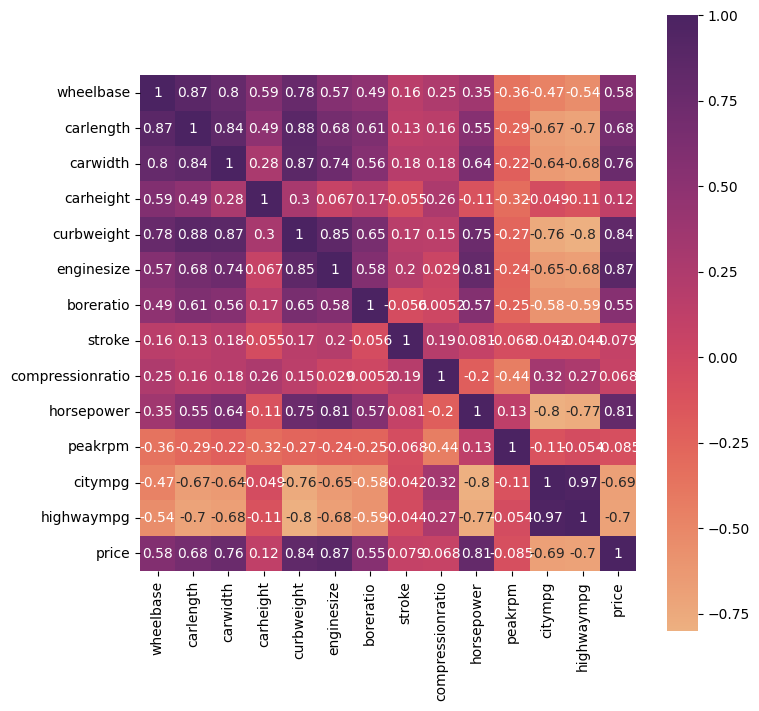

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create correlation matrix with every variable
corrMatrix = newdf.corr(method = "pearson")

f, ax = plt.subplots(figsize = (8, 8))

#turn correlation matrix into a heatmap and graph
sns.heatmap(corrMatrix, vmax = 1, square = True, annot = True, cmap = "flare")

plt.show()

Looking at the above heatmap, since we're analyzing what factors have the heaviest influence on car price, the best place to look is the bottom line of the heatmap labeled "price." There appears to be several factors that have a strong positive correlation with car price including curb weight, engine size, and horsepower.

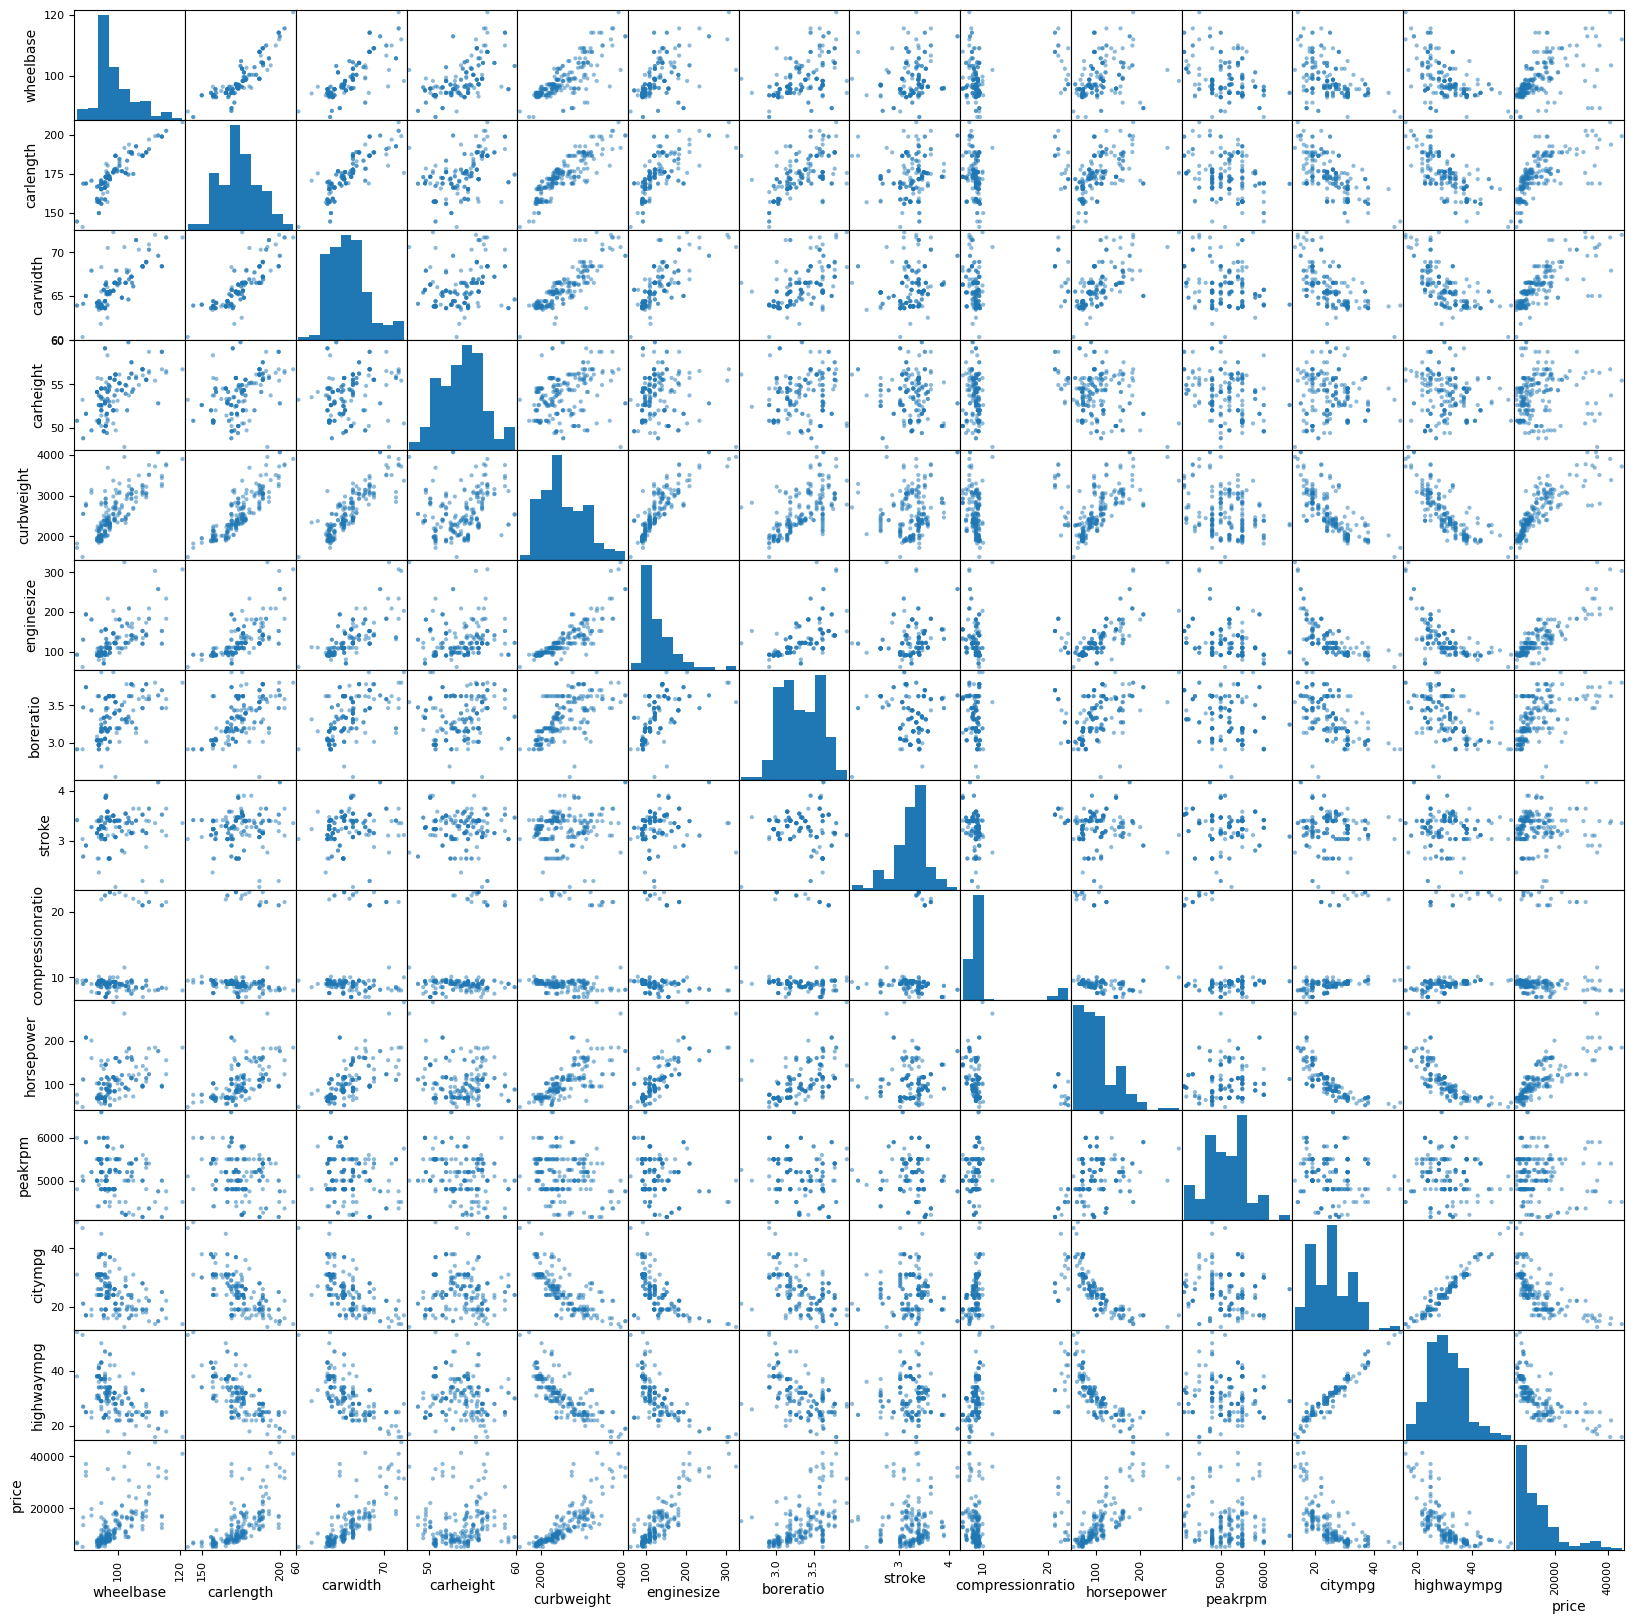

In [ ]:
#plot scatter matrix of each variable
pd.plotting.scatter_matrix(newdf, figsize=(20,20), diagonal = 'hist')
plt.show()

Once again in this scatter matrix, we're analyzing price so we'll look at the bottom row labeled "price." From just looking at the variables with the highest correlation, engine size and horse power appear to be the most linear while curb weight looks curved.

In [ ]:
import statsmodels.api as sm
#define y as the price variable
y = newdf["price"]
#define x as every other category
x = newdf.drop("price", axis = 1)

#create method to do backwards elemination for model selection
def backward_elimination(x, y, significance_level):
  #loop until max p-value is smaller than significance_level
  while True:
    #add y-intetrcept
    x = sm.add_constant(x)
    #create OLS model
    model = sm.OLS(y, x).fit()
    p_values = model.pvalues
    #print out p-values
    print("P-vales\n", p_values)
    #get max p-value
    maxp = p_values.max()
    print("Max p-value:", maxp)
    #check against significance_level
    if(maxp > significance_level):
      #if it's larger continue looping
      x = x.drop(p_values.idxmax(), axis = 1)
    else:
      #otherwise return completed model
      return model

In [ ]:
#create a model using .05 significance level
final_model = backward_elimination(x, y, 0.05)


P-vales
 const               2.153583e-03
wheelbase           2.237817e-01
carlength           8.998602e-02
carwidth            4.123470e-02
carheight           2.307275e-01
curbweight          2.793952e-01
enginesize          6.042872e-15
boreratio           4.028501e-01
stroke              1.344272e-04
compressionratio    4.117994e-04
horsepower          5.895880e-02
peakrpm             5.018124e-04
citympg             7.310975e-02
highwaympg          2.057936e-01
dtype: float64
Max p-value: 0.4028500753593235
P-vales
 const               4.797475e-04
wheelbase           2.357226e-01
carlength           7.188068e-02
carwidth            3.764717e-02
carheight           2.195101e-01
curbweight          2.809322e-01
enginesize          4.780966e-15
stroke              1.865185e-04
compressionratio    4.380860e-04
horsepower          7.759871e-02
peakrpm             1.206833e-04
citympg             8.369263e-02
highwaympg          2.144684e-01
dtype: float64
Max p-value: 0.28093219185185

This output shows the process of which variables are eliminated based off of p-value

In [ ]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.38e-76
Time:                        17:42:56   Log-Likelihood:                -1943.1
No. Observations:                 205   AIC:                             3900.
Df Residuals:                     198   BIC:                             3924.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.189e+04   1.08e+04  

This model includes 6 of the total 13 variables selected based on the .05 significance level.

Here is the final model that we will be using for our analysis. It uses 6 of the original 13 variables. It is interesting to note that only two variables we predicted from the heatmap and scatterpot matrix, engine size and horsepower, made it into the final regression model.

Two other things to note would be the coefficient of determination (.842) and the adusted coefficent of multiple determination (.838). Because they are very similar, we can assume that the model fits the data well not because we added more factors, but because the variables we chose fit the data well.

The second thing to notice is the F-score (176.3) and the p-value (1.38e-76). Because the F-statistic is large and the p-value is small we can conclude that not all coeficents to x-variables are equal to 0.

In [ ]:
#create two new dataframes using the selected values
xvalues = newdf[["enginesize", "carwidth", "peakrpm", "stroke", "compressionratio", "horsepower"]]
yvalue = newdf["price"]
#fit model
xvalues2 = sm.add_constant(xvalues)
model = sm.OLS(yvalue, xvalues2).fit()
print(model.params)

const              -61885.499433
enginesize            118.331864
carwidth              777.292520
peakrpm                 2.280449
stroke              -2932.639707
compressionratio      266.688389
horsepower             39.089367
dtype: float64


In [ ]:
#Get the MSE of linear regression model
mse = model.mse_resid
print("MSE:",mse)

10369647.200823983


In [ ]:
#Get the MSPR of linear regression model
predictions = model.predict(xvalues2)
MSPR = ((yvalue - predictions) ** 2).mean()
print("MSPR:",MSPR)

MSPR: 10015561.686649505


In [ ]:
#Create confidence intervals for x-value coefficents at the .05 significance level
conf_intervals = model.conf_int()
print(conf_intervals)

                             0             1
const            -83277.685264 -40493.313601
enginesize           93.691445    142.972283
carwidth            452.794952   1101.790088
peakrpm               1.035026      3.525872
stroke            -4423.919422  -1441.359992
compressionratio    132.996205    400.380572
horsepower           14.267435     63.911299


Since none of the coefficients include 0 in the interval, we can conclude they are all significant

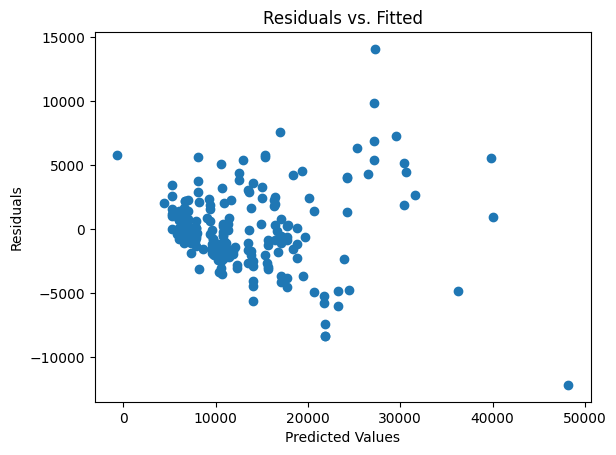

In [ ]:
import matplotlib.pyplot as plt
#create residuals plot
resids = model.resid
plt.scatter(model.predict(), resids)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

There seems to be a bit of a trend with residuals getting larger as predicted values get bigger otherwise it is random.

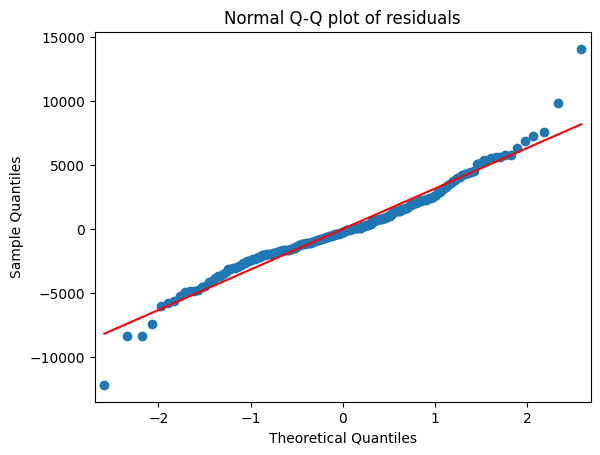

In [ ]:
sm.qqplot(model.resid, line = 's')
plt.title('Normal Q-Q plot of residuals')
plt.show()

For the most part the data looks normal, there only seems to be a few points not on/close to the normal line but the majority is normal.

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np

influence = OLSInfluence(model)
#calculate cook's distance
cooks_distance = influence.cooks_distance
#print out cook's distance values
print(cooks_distance[0])
#print where cook's distance is greater than 1
print(np.where(cooks_distance[0] > 1))

0      0.000005
1      0.003882
2      0.000013
3      0.000874
4      0.000940
         ...   
200    0.001051
201    0.000227
202    0.003712
203    0.005823
204    0.007477
Length: 205, dtype: float64
(array([], dtype=int64),)


Because none of the values for Cook's distance are greater than 1 we can assume that we have no outliers

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#create a new data frame to store x variables and vif score
vif = pd.DataFrame()
#store x values
vif["Feature"] = xvalues2.columns
#store VIF score
vif["VIF"] = [variance_inflation_factor(xvalues2.values, i) for i in range(xvalues2.shape[1])]
print(vif)


            Feature          VIF
0             const  2326.369449
1        enginesize     5.326212
2          carwidth     2.451346
3           peakrpm     1.785210
4            stroke     1.106386
5  compressionratio     1.426540
6        horsepower     4.873946


Because none of the VIF scores of the x-values exceed 10, we can conclude no multicolinearity. We should note that the higher VIF scores make sense because  a larger engine will probably have more horsepower than a smaller engine.

In [ ]:
#Treat LASSO as machine learning
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#Split data into into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xvalues, yvalue, test_size = 0.4, random_state = 42)

#scale data so it's standard
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#create LASSO model
lasso = Lasso()

#Train model
lasso.fit(x_train_scaled, y_train)

#Test model
y_pred = lasso.predict(x_test_scaled)

#Get R^2
lassor2 = r2_score(y_pred, y_test)

print(lassor2)

0.780814874118146


In [ ]:
from sklearn.metrics import mean_squared_error
#Get MSE
lassomse = mean_squared_error(y_pred, y_test)
print(lassomse)

12688985.157168703


Compared to the linear regression coefficient of determination (.84) we can see that the LASSO model is not as good as a fit to this data as linear regression because the LASSO R^2 is .78. Similarly, the LASSO MSE (12688985.15) is much bigger than the linear regression MSE (10369647.20)